In [110]:
import pandas as pd
import numpy as np


import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### read the data

In [2]:
raw_data_csv = pd.read_csv('Index2018.csv')
df_org = raw_data_csv.copy()

### examining the data

In [3]:
df_org.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
## we generally use date as indexes for timeseries data

df_org.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [5]:
## each market index is the portfoli of most traded public company on the respective stock exchange market
## measures the stability of us,german,london,japanese stock exchanges
## number in the var is the number of companies involved in the portfolio,,, s&p500 means 500 comapanies involved

In [6]:
df_org.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_org.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### plotting the dataset

In [8]:
import matplotlib.pyplot as plt

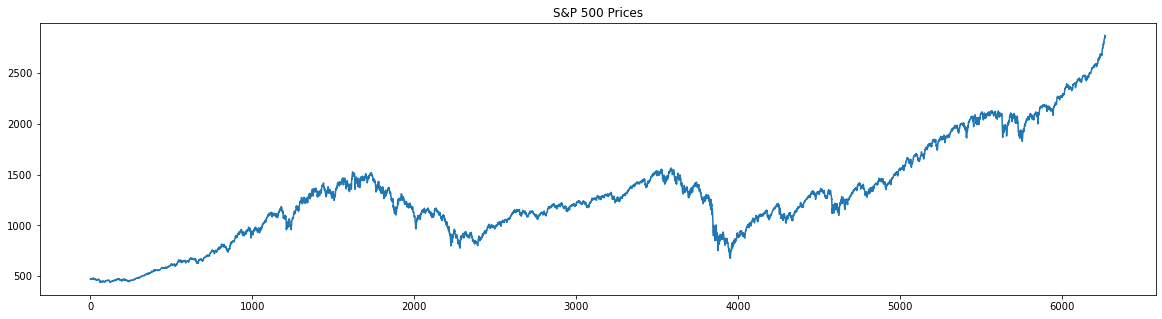

In [9]:
df_org['spx'].plot(title='S&P 500 Prices',figsize=(20,5))

In [10]:
## in proper timeseries the x-axes would show the corresponding dates for each period

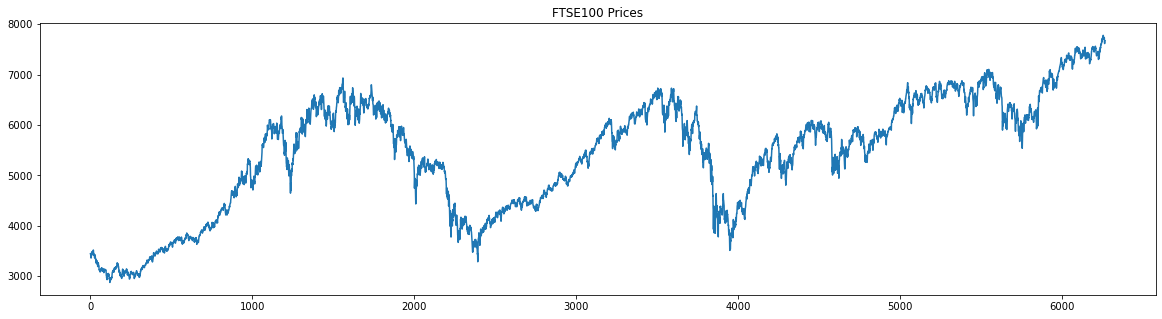

In [11]:
df_org['ftse'].plot(title='FTSE100 Prices',figsize=(20,5))

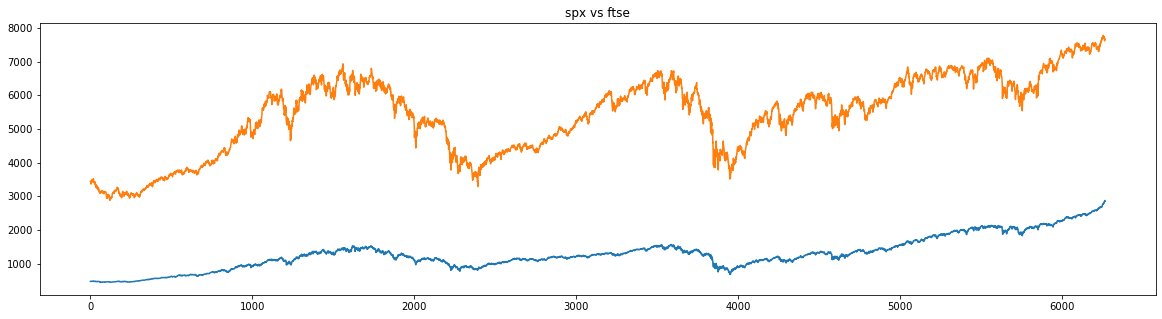

In [12]:

df_org['spx'].plot(title='S&P 500 Prices',figsize=(20,5))
df_org['ftse'].plot(title='FTSE100 Prices',figsize=(20,5))
plt.title('spx vs ftse')
plt.show()

In [13]:
## ftse value is much greater than spx but we can see that they move in the same manner
## spx looks more flater than ftse suggesting spx is much more stable however this is misleading 
## the graph of snp looks more compact-- the snp and ftse has vastly different magnitudes

### The QQ plot

In [14]:
import scipy.stats
import pylab

In [15]:
## the quantile-quantile plot to determine whether a dataset is distributed a certian way
## usually showcases how a data fits a normal distribution

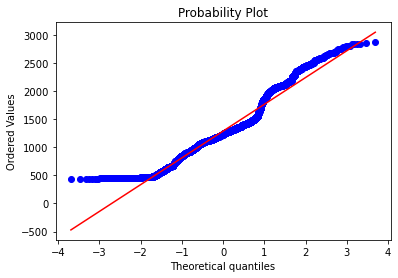

In [16]:
scipy.stats.probplot(df_org['spx'], plot=pylab)
pylab.show()

# series we want to test and the way we want to express the plot

In [17]:
## a qq plot takes all the value a variable can take and arranges them in ascending order
## x-axis ::: how many std dev away from the mean these values are 

In [18]:
## red diagonal line show what the datapoint should follow if they follow a normal distribution

In [19]:
## in this case we can see more data around 500 value, thus the data is not normally distributed thus we cannot use
## elegant statistics of normal distribution to make successful forcast however this is usually what we expect from 
## time-series data

### Converting data into time-series format

In [20]:
## converting date column into datetime

In [22]:
df_org['date'].describe()

count           6269
unique          6269
top       23/09/2014
freq               1
Name: date, dtype: object

In [23]:
df_org['date'].head()

0    07/01/1994
1    10/01/1994
2    11/01/1994
3    12/01/1994
4    13/01/1994
Name: date, dtype: object

In [24]:
## this is in the form of dd/mm/yy

In [25]:
df_org['date']=pd.to_datetime(df_org['date'],dayfirst=True)
df_org['date'].head()

0   1994-01-07
1   1994-01-10
2   1994-01-11
3   1994-01-12
4   1994-01-13
Name: date, dtype: datetime64[ns]

In [26]:
df_org['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Setting the index

In [27]:
df_org.set_index('date',inplace=True)
df_org.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting the desired frequency

In [28]:
df_org = df_org.asfreq('d') # since our date is based on daily obeservation (day level)

In [30]:
df_org.head() # we generated new periods which do not have values associated with them

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [31]:
## since our data is closing price of financial indeces, these can only be recorded during working days,
## thus we are not interested in any weekdends or holidays

In [34]:
## indeed the value 01/08 and 01/9 etc are the hodiyds in the actual calendar thus no use of filling those value
## let us instead use the business day insead of normal day
## this avoids adding any unnecessary time periods

In [33]:
df_org= df_org.asfreq('b')
df_org.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling missing values

In [35]:
df_org.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [36]:
## setting the frequency to business day must have generated 8 days for which we have no data available

In [37]:
## let us fill the data for spx column with forward fill

df_org['spx']=df_org['spx'].fillna(method='ffill')
df_org.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [38]:
## let us fill ftse using backward fill
df_org['ftse']= df_org['ftse'].fillna(method='bfill')
df_org.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [40]:
## let use average value to fill dax attribute

df_org['dax']=df_org['dax'].fillna(value=df_org['dax'].mean())
df_org.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [41]:
df_org['nikkei']=df_org['nikkei'].fillna(method='ffill')


### Handling SupplementaL data

#### Simplifying the dataset

In [42]:
## in timeseries we often end up analysing the single sequence on its own-- here we will analysze how snp500 performs

In [43]:
df_org['market_value']=df_org['spx']

In [44]:
### deleting a column from the dataframe

del df_org['spx']

In [45]:
df_org.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.672753,1288.642547
std,2752.604984,1145.568370,4043.795272,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10701.130000,992.715221
50%,5774.380000,5663.300000,15030.510000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [49]:
df_org.drop(['dax','ftse'],axis=1,inplace=True) ## alternate way to get rid of columns

KeyError: "['dax' 'ftse'] not found in axis"

In [48]:
del df_org['nikkei']

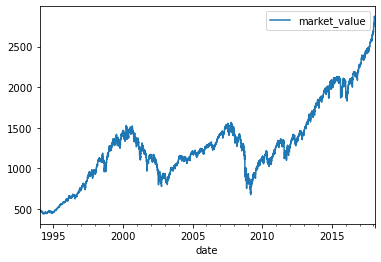

In [51]:
df_org.plot()

### Splitting the data

In [53]:
## into train and test set to compare the prediction with the actul values

## the closer the forcast the better the model

the closer the forcast the better the model performance

In [54]:
size_train = int(len(df_org)*0.8) # to detrmine the cutoff point

In [55]:
df = df_org.iloc[:size_train]
df_test = df_org.iloc[size_train:]

In [61]:
len(df_test)

1256

In [62]:
# validate there is no overlapping

len(df_org)==len(df)+len(df_test)

True

### White Noise

In [66]:
wn = np.random.normal(loc=df['market_value'].mean(),scale=df['market_value'].std(), size=len(df))

In [67]:
df['wn'] = wn

<ipython-input-67-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [68]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1101.811596
std,292.559287,289.669292
min,438.920000,152.387567
25%,914.620000,901.994965
50%,1144.650000,1093.139536
75%,1316.280729,1296.598846
max,1570.252238,2208.861371


In [69]:
### we can see that the mean and standard deviation of the two series is similar since we made it so
## since each one is genrated individually, the average does not have to end up being the same

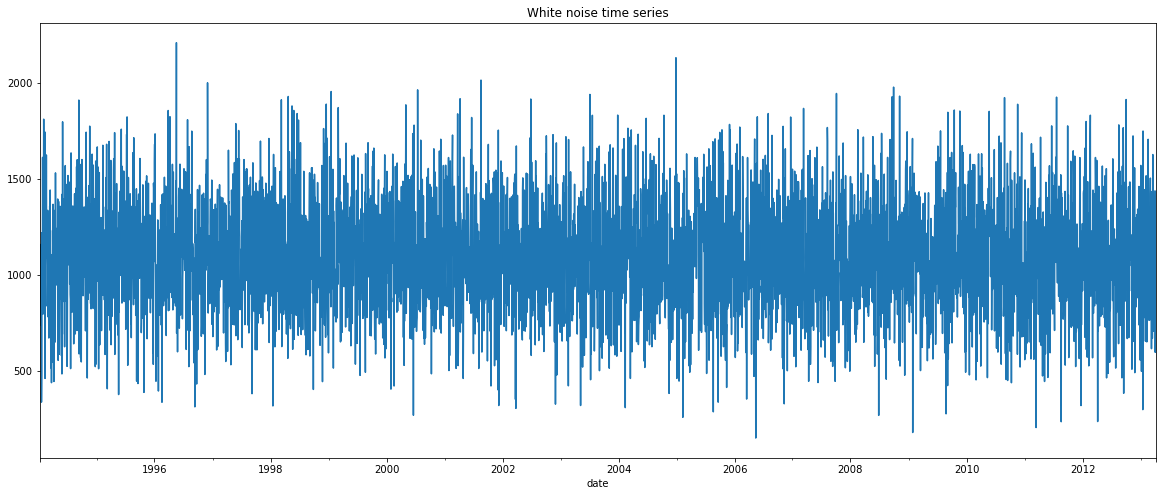

In [76]:
df['wn'].plot(title='White noise time series',figsize=(20,8))
plt.show()

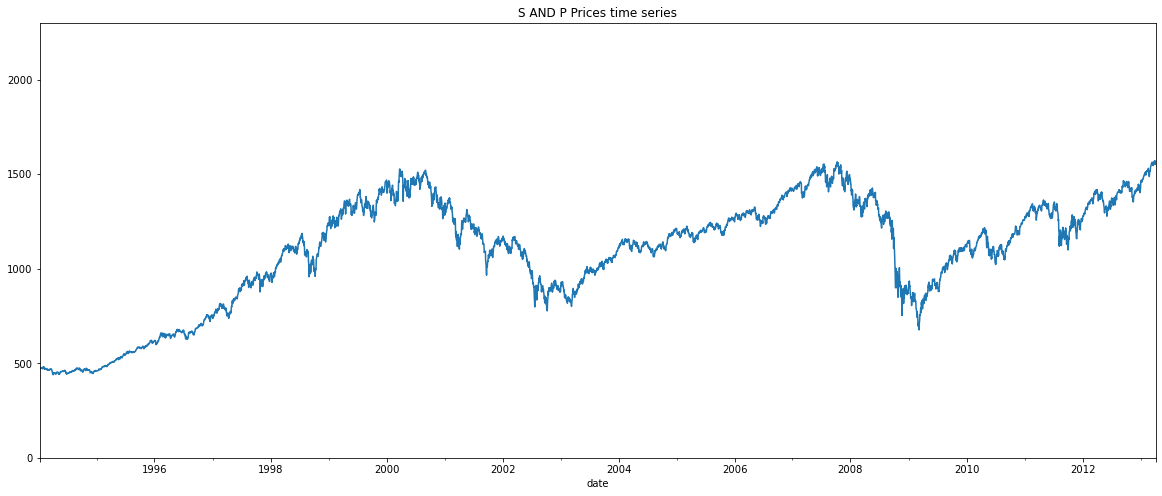

In [80]:
## plotting the sandp prices for comparision

df['market_value'].plot(title="S AND P Prices time series",figsize=(20,8),ylim=[0,2300])
plt.show()

In [82]:
### there are smaller jumps between periods for s&p values 
### since the prices are non-random we need to recognize the pattern to make accurate forcast

### RandomWalk 

another peculiar type of time series

### Stationarity

In [87]:
## specify the time series we are analysing
sts.adfuller(df['market_value'])

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [88]:
## since the statistic (-1.736 > all values) we don't have suffience evidence of stationarity in the dataset

In [97]:

## p-value : 0.4121 means there is a 40% chance of not rejecting a null
### 40% chance that the data comes from non-stationary process

## the number of lag used in the regression is 18 while detrmining the t-statistics
## there is some autocorrelation going back 18 periods
## 5002 observations were used in the analysis --- this value depends on number of lag used in the regression
## these two (5002+18) should add up to the size of the dataset

### 39904.88 ----> maximized information criteria provided there is some autocorrelation -- the lower the value the easier it is to 
## make predition to the future


### white noise is a stationarity process

indicated by lower p-value

In [96]:
## let us compare it with whitenoise data we generated
## we know that white noise is stationarity process thus we expect to get very low p-value
## sice there is no auto-correlation in white noise there should be no lags involved in the regression

sts.adfuller(df['wn'])

(-70.41033301983107,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70697.5735569692)

### Seasonality

peculiarity we observe in time series data

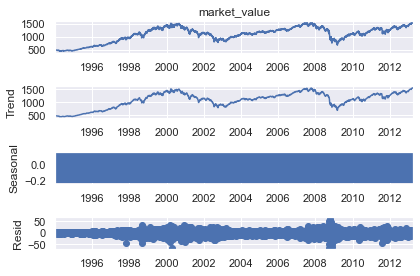

In [99]:
s_dec_additive = seasonal_decompose(df['market_value'],model="additive")
s_dec_additive.plot()
plt.show()

In [101]:
## here we can see trend closely resemblems observed series because the decomposition function uses the previous perod
## value as a trend setter
## we have determined the current period prices are the best predictor for the next period prices

## if we observe seasonal pattern, we will have other prices as better predictors

## for eg, if the prices are consistently bigger at the beginning of the month compared to the end, we will be better
## off using the values from some 30periods ago than from 1 periods ago

In [102]:
### the trend part of the decompostion explains most of the variability of data
## seasonality: looks like a rectangle because::: 
## values are constantly oscillaiting back and forth and the figure size is too small 
## there is no concrete cyclical pattern determined by using naive decomposition

In [103]:
### residuals are the error of our model estimates: difference between true values and predictions for any period
## we can see that the residuals vary greatly around  2000 and around 2008 explained by instability caused by
## .com and housing prices bubbles respectively 

In [104]:
## additive decomposition suggest no seasonality in the data

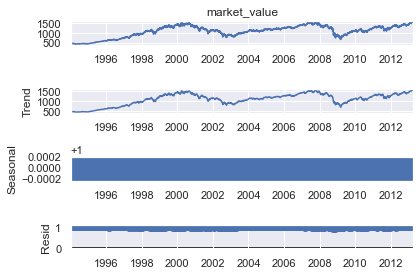

In [105]:
s_dec_multiplicative = seasonal_decompose(df['market_value'],model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

In [107]:
## the seasonal sequence has no clear pattern once again
## and the trend closely resembles the observed series

In [108]:
## Thus can say that there is no seasonality in s&p prices

In [109]:
## since the trend resembles the actual value,, let us look at the correlation between past and present values

### AutoCorrelation Function (ACF)

In [ ]:
pd.plotting.autocorrelation_plot

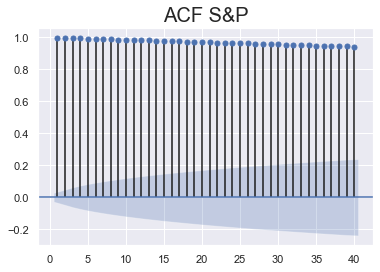

In [111]:
sgt.plot_acf(df['market_value'],lags=40,zero=False)
plt.title("ACF S&P", fontsize=20)
plt.show()

In [112]:
## the blue area around the x-axis indicates significance --- the values situated outside are significatly different 
## than zero which suggest the existence of autocorrealtion for that specific lag

In [114]:
## the band incresing suggest that : the greater the distance in time the more unlikey it is that this autocorrelation
## persists -
## todays prices are closer to yesterdays price than it is 20 days ago 
## thus we need to make sure the autocorelation coefficient in the higher lag is sufficiently greater to be significantly
# different from 0


### since all the lines are higher from the blue region this suggest the coeff are significant which is the indicatino
## of time dependence in the data

## autocorrelaiton barely diminishes as the lag increses -- i.e prices even 30 days back could serve as decent estimator

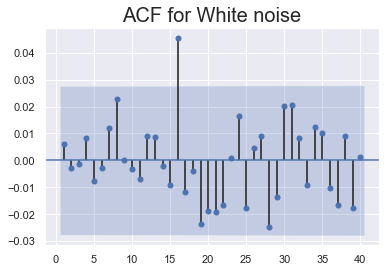

In [116]:
## let us examine the ACF of the white noise series


sgt.plot_acf(df['wn'],lags=40, zero=False)
plt.title('ACF for White noise',fontsize=20)
plt.show()

In [ ]:
## there are patterns of positiev and negative autocorelation
## all the lines fall with in the blue area thus the coeff are not significant across the entire plot
## there is no autocorrelaiton for any lag wchihc is one of the assumptions of white noise data


### Partial Autocorrelation Function (PACF)

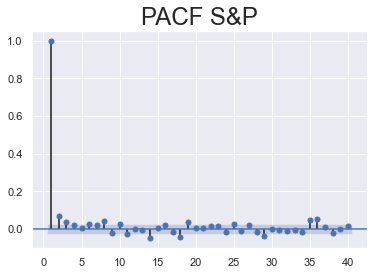

In [117]:
sgt.plot_pacf(df['market_value'],lags=40,zero=False,method=('ols'))
plt.title('PACF S&P',size=24)
plt.show()

In [118]:
## onlt the first elements are significantly diffrent from 0 but in acf all values upto 40 lags were significant 
## 9th lag is negative-- higher value 9th period ago resulted in lower value today and v.v 

## most value afer the 3rd lag are within the blue area -- not significantly diffrent than zero -- thus the numeric
## value attached to them are not important 
## since we can assume they are all estentially 0 , being positive or negative is somewhat random without any lasting 
## effects 

In [119]:
# lets see PACF for white noise

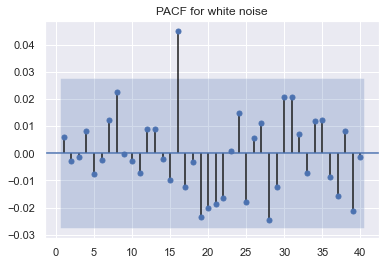

In [120]:
sgt.plot_pacf(df['wn'],lags=40,zero=False,method=('ols'))
plt.title('PACF for white noise')
plt.show()

In [121]:
## most of the values are not sig diff than 0 
## though some are outise blue area they are complelty random 
## thus we can say there are no autocorrelaiton in the whitenoise